In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Memuat dataset
df = pd.read_csv('DATA RUMAH.csv', sep=',')
df.head()

,NO,NAMA RUMAH,HARGA,LB,LT,KT,KM,GRS
0,1,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800000000,220,220,3,3,0
1,2,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600000000,180,137,4,3,2
2,3,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000000000,267,250,4,4,4
3,4,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430000000,40,25,2,2,0
4,5,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000000000,400,355,6,5,3


In [ ]:
df.info

<bound method DataFrame.info of         NO                                         NAMA RUMAH        HARGA  \
0        1  Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...   3800000000   
1        2  Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...   4600000000   
2        3  Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...   3000000000   
3        4           Rumah Baru Tebet, Tebet, Jakarta Selatan    430000000   
4        5  Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...   9000000000   
...    ...                                                ...          ...   
1005  1006  Rumah Strategis Akses Jalan 2mobil Di Menteng ...   9000000000   
1006  1007             Tebet Rumah Siap Huni Jln 2 Mbl Nyaman   4000000000   
1007  1008        Di Kebun Baru Rumah Terawat, Area Strategis   4000000000   
1008  1009  Dijual Cepat Rumah Komp Depkeu Dr Soepomo Tebe...  19000000000   
1009  1010                Dijual Rumah Kokoh Di Gudang Peluru  10500000000   

       LB   LT  KT  KM  GRS  
0

In [ ]:
# Memisahkan kolom independent & dependent
X = df[['LB', 'LT', 'KT','KM','GRS']]
y = df['HARGA']

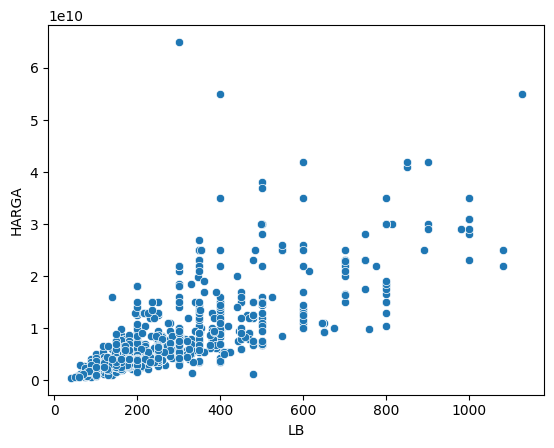

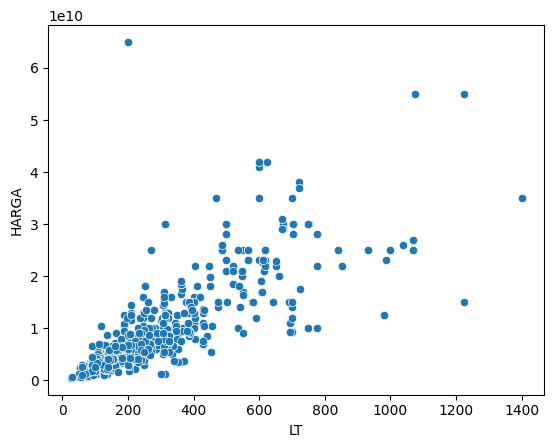

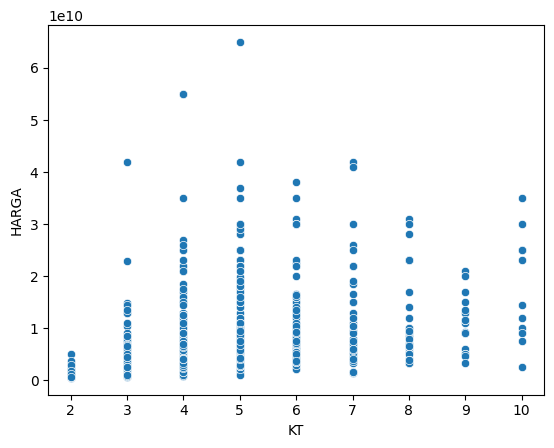

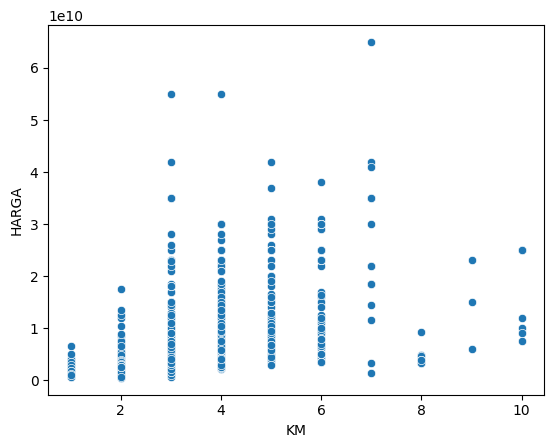

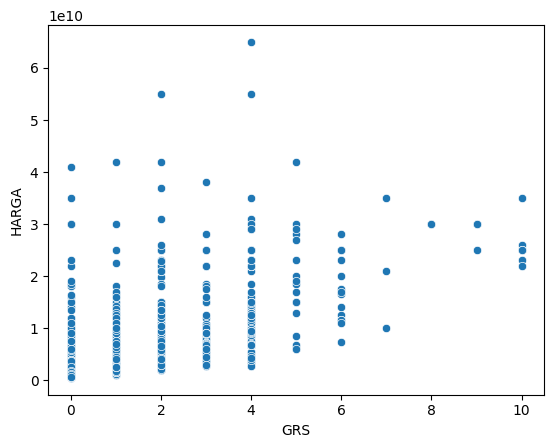

In [ ]:
# Visualisasi korelasi antara variabel input dengan harga unit real estate menggunakan scatter plot
for column in X.columns:
    sns.scatterplot(x=column, y='HARGA', data=df)
    plt.show()

<ipython-input-6-98b64dcbc0dc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


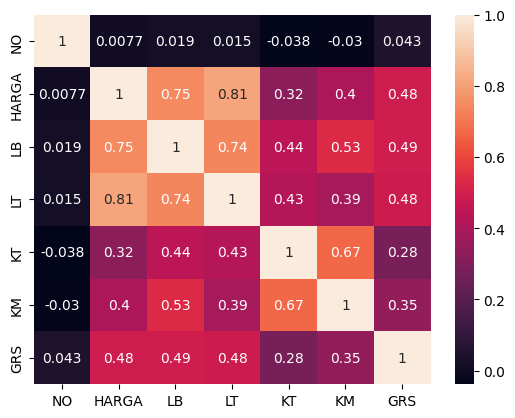

In [ ]:
# Analisis Korelasi
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [ ]:
def datates(nilai,state):
  # Pembagian Data Training dan Testing
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=nilai, random_state=state)

  # Membangun model regresi linier
  model = LinearRegression()
  model.fit(X_train, y_train)

  # Evaluasi Model
  y_pred = model.predict(X_test)
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  print("Train: ",X_train.shape)
  print("Test: ",y_test.shape)

  regr = LinearRegression()
  regr.fit(X_train, y_train)

  print("\nIntercept/Bias: ",regr.intercept_)
  print("Coeficient: ",regr.coef_)

  pred =regr.predict(X_test)
  rmse = np.sqrt(metrics.mean_squared_error(np.array(y_test), y_pred))


  # Evaluasi Model
  y_pred = model.predict(X_test)
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  print("\nR-squared:", r2)
  print("RMSE: ", rmse)


In [ ]:
datates(0.2,20)

Train:  (808, 5)
Test:  (202,)

Intercept/Bias:  -445206678.91081905
Coeficient:  [ 1.24422549e+07  2.36828480e+07 -6.29399435e+08  3.41505531e+08
  3.48175988e+08]

R-squared: 0.8017750468717614
RMSE:  3020604104.4383545


In [ ]:
datates(0.3,30)

Train:  (707, 5)
Test:  (303,)

Intercept/Bias:  -447043059.8587942
Coeficient:  [ 1.20680264e+07  2.33344577e+07 -6.78562728e+08  5.11675602e+08
  2.99584796e+08]

R-squared: 0.7691911957151842
RMSE:  3549839049.112725


In [ ]:
datates(0.4,40)

Train:  (606, 5)
Test:  (404,)

Intercept/Bias:  -590737857.8297606
Coeficient:  [ 1.12624306e+07  2.44990719e+07 -4.86333878e+08  1.80209664e+08
  4.77079016e+08]

R-squared: 0.6533386201841497
RMSE:  4730133940.481863
